<a href="https://colab.research.google.com/github/jmlucasusc4/LogisticRegression/blob/main/Bank_Logistic_RegressionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Section 1

**Import the Libraries**

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv('/content/portu_banking_final.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [87]:
#What is the significance of the y column in the dataset and what are the value counts of the y column?

In [88]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999.0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [89]:
#Part IV : What is the ratio of the two classes ? Are they balanced ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


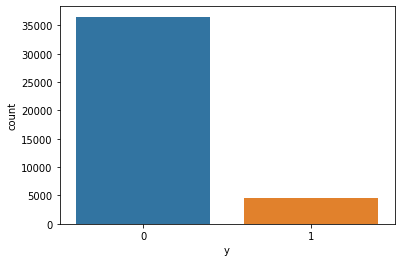

In [90]:
sns.countplot(data['y'])

In [91]:
#Classes are unbalanced
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [92]:
#Y is determined to be the output variable.

##Section II : Data Cleaning

In [93]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [94]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [95]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [96]:
data['housing']=data['housing'].replace('unknown','yes')

In [97]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [98]:
data['loan']=data['loan'].replace('unknown','no')

In [99]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [100]:
data.month.value_counts()


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [101]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [102]:
# check the osition of all the age range value 
import re
s=""
i=-1
for ag in data.age:
  i+=1
  a=re.search("\d\d-\d\d", str(ag))
  if a!=None:
    print(a)
    print(i)

<re.Match object; span=(0, 5), match='35-30'>
74
<re.Match object; span=(0, 5), match='30-35'>
149
<re.Match object; span=(0, 5), match='25-30'>
480
<re.Match object; span=(0, 5), match='18-25'>
858
<re.Match object; span=(0, 5), match='30-32'>
967
<re.Match object; span=(0, 5), match='50-55'>
1085
<re.Match object; span=(0, 5), match='30-35'>
1457
<re.Match object; span=(0, 5), match='30-35'>
2571
<re.Match object; span=(0, 5), match='45-50'>
6475
<re.Match object; span=(0, 5), match='20-25'>
6987
<re.Match object; span=(0, 5), match='20-40'>
7190
<re.Match object; span=(0, 5), match='35-40'>
9832
<re.Match object; span=(0, 5), match='30-40'>
28550


In [103]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [104]:
# replacing all the age range with theire respective mean value
data['age']=data['age'].replace(['35-30'],33)
data['age']=data['age'].replace(['30-35'],33)
data['age']=data['age'].replace(['25-30'],28)
data['age']=data['age'].replace(['18-25'],22)
data['age']=data['age'].replace(['30-32'],31)
data['age']=data['age'].replace(['50-55'],53)
data['age']=data['age'].replace(['50-55'],53)
data['age']=data['age'].replace(['45-50'],48)
data['age']=data['age'].replace(['20-25'],23)
data['age']=data['age'].replace(['20-40'],30)
data['age']=data['age'].replace(['35-40'],38)
data['age']=data['age'].replace(['30-40'],33)

In [105]:
data['age']=data['age'].apply(pd.to_numeric)

In [106]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.023696,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.421378,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [107]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [108]:
missing_value= data.isna().sum()
missing_value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

##Section III : Exploring data with Group by

In [109]:
#Groupby function'
#I : y
data.groupby('y').y.count()

y
0    36548
1     4640
Name: y, dtype: int64

In [110]:
#II :job 
data['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
SERVICES             3
RETIRED              3
ADMIN.               2
STUDENT              2
UNKNOWN              1
TECHNICIAN           1
BLUE-COLLAR          1
MANAGEMENT           1
HOUSEMAID            1
Name: job, dtype: int64

In [111]:
data['job']=data['job'].replace('ADMIN.','admin.')
data['job']=data['job'].replace('BLUE-COLLAR','blue-collar')
data['job']=data['job'].replace('HOUSEMAID','housemaid')
data['job']=data['job'].replace('MANAGEMENT','management')
data['job']=data['job'].replace('RETIRED','services')
data['job']=data['job'].replace('SERVICES','services')
data['job']=data['job'].replace('STUDENT','student')
data['job']=data['job'].replace('TECHNICIAN','technician')
data['job']=data['job'].replace('entrepreneur',8)
data['job']=data['job'].replace('self-employed',9)
data['job']=data['job'].replace('unemployed',10)
data['job']=data['job'].replace('unknown','UNKNOWN')
data['job']=data['job'].replace('UNKNOWN','admin.')

In [112]:
#III : marital
data.groupby('marital').marital.count()


marital
D               4
M               5
S               3
divorced     4608
married     24923
single      11565
unknown        80
Name: marital, dtype: int64

In [113]:
data['marital']=data['marital'].replace('D','divorced')
data['marital']=data['marital'].replace('M','married')
data['marital']=data['marital'].replace('S','single')
data['marital']=data['marital'].replace('unknown','married')

In [114]:
#IV : education
data.groupby('education').education.count()

education
basic-4y                  12
basic-6y                   6
basic-9y                  10
basic.4y                4164
basic.6y                2286
basic.9y                6035
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: education, dtype: int64

In [115]:
data['education']=data['education'].replace('unknown','university.degree')

In [116]:
data.groupby('default').default.count()

default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [117]:
data['default']=data['default'].replace('unknown','no')

**Section III : Exploratory Data Analysis**

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

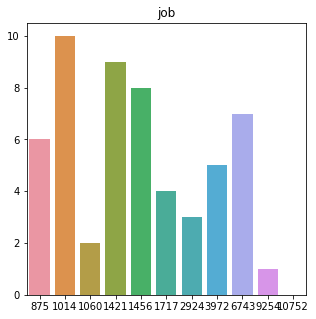

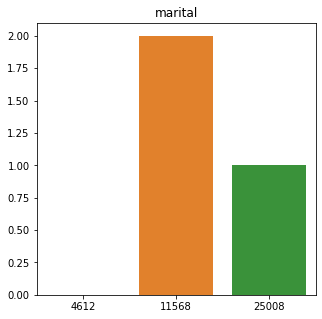

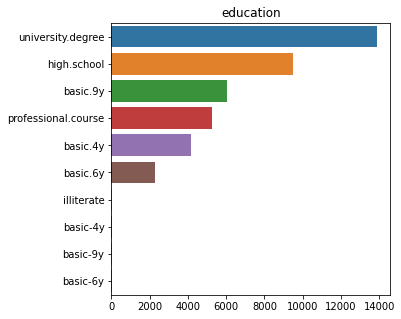

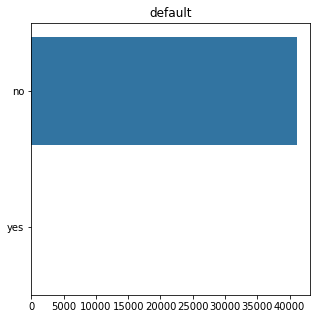

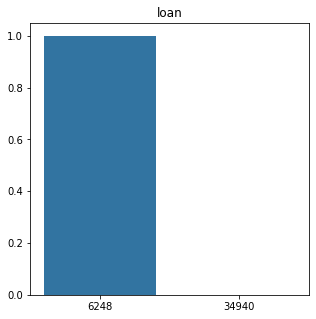

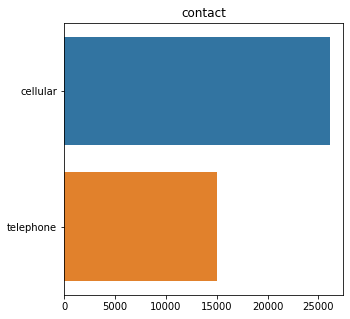

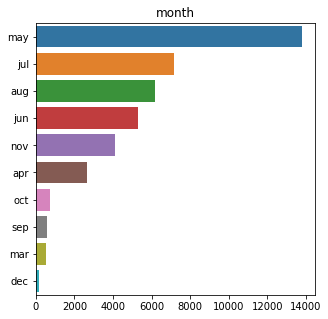

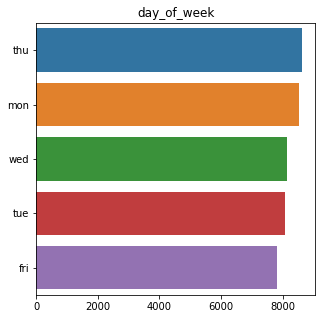

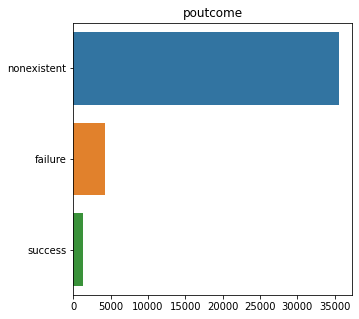

In [142]:
data_b=['job','marital','education','default','loan','contact','month','day_of_week','poutcome']
for col in data_b:
  plt.figure(figsize=(5,5))
  sns.barplot(data[col].value_counts().values,data[col].value_counts().index)
  plt.title(col)
plt.show()

In [119]:
data_corr=data.corr()
data_corr

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000876,0.004597,-0.032926,0.024377,-0.000397,0.000841,0.129348,0.010743,-0.017748,0.030411
duration,-0.000876,1.000000,-0.071699,-0.044035,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004597,-0.071699,1.000000,0.045353,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.032926,-0.044035,0.045353,1.000000,-0.518260,0.241416,0.070331,-0.082578,0.263918,0.331380,-0.288609
previous,0.024377,0.020640,-0.079141,-0.518260,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000397,-0.027968,0.150754,0.241416,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000841,0.005312,0.127836,0.070331,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129348,-0.008173,-0.013733,-0.082578,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010743,-0.032897,0.135133,0.263918,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017748,-0.044703,0.144095,0.331380,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<function matplotlib.pyplot.show>

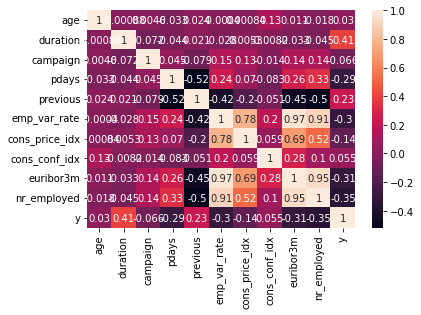

In [120]:
sns.heatmap(data_corr,annot=True)
plt.show

**Section IV : Categorical Variable Encoding**

In [121]:
data.groupby('marital').marital.count()

marital
divorced     4612
married     25008
single      11568
Name: marital, dtype: int64

In [122]:
data['marital']=data['marital'].replace('divorced',0)
data['marital']=data['marital'].replace('married',1)
data['marital']=data['marital'].replace('single',2)

In [123]:
data.marital

0        1
1        1
2        2
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    2
Name: marital, Length: 41188, dtype: int64

In [124]:
data['job']=data['job'].replace('admin.', 0)
data['job']=data['job'].replace('blue-collar',1)
data['job']=data['job'].replace('housemaid',2)
data['job']=data['job'].replace('management',3)
data['job']=data['job'].replace('retired', 4)
data['job']=data['job'].replace('services',5)
data['job']=data['job'].replace('student',6)
data['job']=data['job'].replace('technician',7)
data['job']=data['job'].replace('technician',7)

In [125]:
data.job

0        1
1        7
2        3
3        5
4        4
        ..
41183    4
41184    2
41185    0
41186    7
41187    6
Name: job, Length: 41188, dtype: int64

In [126]:
data['housing']=data['housing'].replace('no',0)
data['housing']=data['housing'].replace('yes',1)

In [127]:
data.housing

0        1
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    1
41186    0
41187    0
Name: housing, Length: 41188, dtype: int64

In [128]:
data['loan']=data['loan'].replace('no',0)
data['loan']=data['loan'].replace('yes',1)

In [129]:
data.loan

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    1
41186    1
41187    0
Name: loan, Length: 41188, dtype: int64

**Section V : Preliminary Training**

In [130]:
#Split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [131]:
X=data.drop(['y'],axis=1)
Y=data['y']

In [132]:
X.drop(['education','default','contact','month','day_of_week','poutcome','job'],axis=1,inplace=True)

In [133]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [134]:
X.head()

,age,marital,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1
1,53,1,0,0,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,2,1,0,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,1,0,0,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,1,1,0,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2


In [135]:
#Create model
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Model Testing 

In [136]:
y_pred=model.predict(x_test)

In [137]:
model_test=model.score(x_test,y_test)

In [138]:
print('accuracy score is',model_test)

accuracy score is 0.9067734887108522


In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10924
           1       0.66      0.40      0.50      1433

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.72     12357
weighted avg       0.89      0.91      0.90     12357



### Additional Metrics

In [141]:
print('confusion_matrix is')
print(confusion_matrix(y_test,y_pred))
print('accuracy is',model_test)

confusion_matrix is
[[10637   287]
 [  865   568]]
accuracy is 0.9067734887108522
